In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes

### Mapping out the LDNe results 

In [2]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
Africa = gpd.read_file("map/Africa.dbf")

In [4]:
Africa.head()

,ID,CODE,COUNTRY,geometry
0,1,ALG,Algeria,"POLYGON ((-5.76362 25.58625, -5.84122 25.63542..."
1,2,ANG,Angola,"POLYGON ((13.36632 -8.32173, 13.36623 -8.32155..."
2,3,ANG,Angola,"POLYGON ((12.80576 -4.80649, 12.80092 -4.81917..."
3,4,ANG,Angola,"POLYGON ((11.76834 -16.79933, 11.76404 -16.799..."
4,5,ANG,Angola,"POLYGON ((12.89840 -5.98802, 12.89370 -5.98675..."


In [5]:
Ne_manifest = pd.read_csv("Ne_manifest.tsv", sep="\t")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(Ne_manifest[['country', 'location', 'year','species_gambiae_coluzzii',
                         'counts', 'Ne_estimate', 'Jackknife_CI_lower', 'Jackknife_CI_upper']])

,country,location,year,species_gambiae_coluzzii,counts,Ne_estimate,Jackknife_CI_lower,Jackknife_CI_upper
0,Angola,Luanda,2009,coluzzii,81,190.4,110.4,519.7
1,Burkina Faso,Bana,2012,coluzzii,42,Infinite,Infinite,Infinite
2,Burkina Faso,Bana,2012,gambiae,22,2816.5,1980.7,4866.3
3,Burkina Faso,Pala,2012,coluzzii,11,Infinite,Infinite,Infinite
4,Burkina Faso,Pala,2012,gambiae,48,1698.3,745.4,Infinite
5,Burkina Faso,Souroukoudinga,2012,coluzzii,29,Infinite,Infinite,Infinite
6,Burkina Faso,Souroukoudinga,2012,gambiae,28,11545.1,5769.5,82678120.0
7,Burkina Faso,Bana,2014,coluzzii,47,Infinite,Infinite,Infinite
8,Burkina Faso,Bana,2014,gambiae,15,Infinite,Infinite,Infinite
9,Burkina Faso,Pala,2014,gambiae,16,102.7,47.3,Infinite


Filter out any infinite values, and change the Ne columns to float

In [6]:
Ne_manifest = Ne_manifest[Ne_manifest.Ne_estimate != 'Infinite']
Ne_manifest.Ne_estimate = Ne_manifest.Ne_estimate.astype(float)

In [7]:
Ne = gpd.GeoDataFrame(
    Ne_manifest, geometry=gpd.points_from_xy(Ne_manifest.longitude, Ne_manifest.latitude))
Ne.crs = "EPSG:4326"

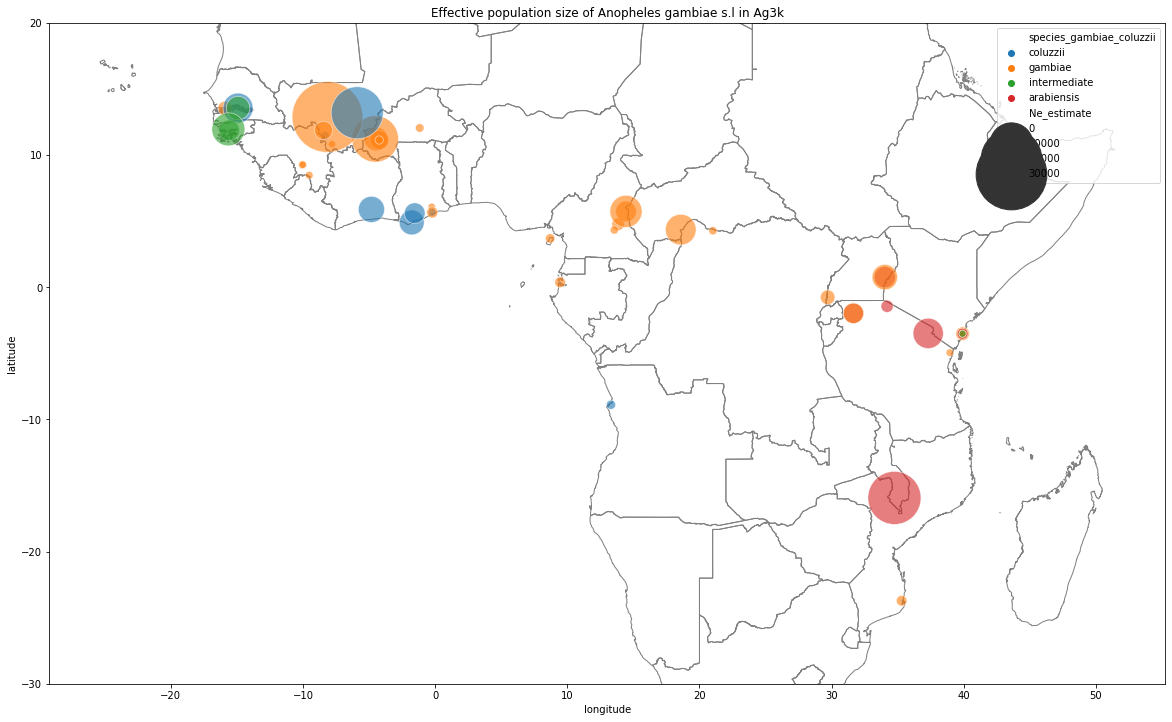

In [8]:
f, ax = plt.subplots(figsize=[20,20])
Africa.plot(ax=ax, color='none', edgecolor='grey')
sns.scatterplot(x=Ne['longitude'], y=Ne['latitude'], data=Ne, 
                size=Ne['Ne_estimate'], sizes=tuple([50,5000]),
                hue=Ne['species_gambiae_coluzzii'], alpha=0.6)
ax.set_ylim(-30, 20) # added/substracted value is to give some margin around total bounds
plt.title("Effective population size of Anopheles gambiae s.l in Ag3k")
plt.savefig("Effective population size of Ag1000g Phase 3 populations")
plt.show()